### Imports:
Imports the essential libraries for data manipulation (pandas, numpy) and data visualization (matplotlib.pyplot, seaborn).

In [443]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Data Loading & Concatenation:
Loads the training and testing datasets from CSV files. It drops the target variable (SalePrice) from the training set and concatenates both datasets into a single dataframe (all_data). Combining them ensures that any data cleaning and feature engineering are applied consistently across both the train and test sets.

In [444]:
train_data = pd.read_csv(r'C:\Users\m\Desktop\House-Prices-Project\Data\train.csv')
test_data = pd.read_csv(r'C:\Users\m\Desktop\House-Prices-Project\Data\test.csv')
all_data = pd.concat([train_data.drop('SalePrice', axis=1), test_data], ignore_index=True)
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)
print("All data shape:", all_data.shape)

Train data shape: (1460, 81)
Test data shape: (1459, 80)
All data shape: (2919, 80)


### Log Transformation:
Applies a logarithmic transformation ($log(1+x)$) to the SalePrice. Since house prices are typically right-skewed, this transformation brings the distribution much closer to a normal shape

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


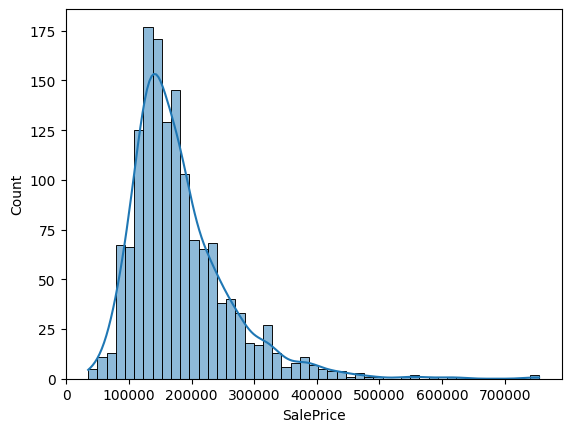

In [445]:
sns.histplot(train_data['SalePrice'], kde=True)
print("Skewness:", train_data['SalePrice'].skew())
print("Kurtosis:", train_data['SalePrice'].kurtosis())

In [446]:
train_data['SalePrice'] = np.log1p(train_data['SalePrice'])

Skewness: 0.12134661989685333
Kurtosis: 0.809519155707878


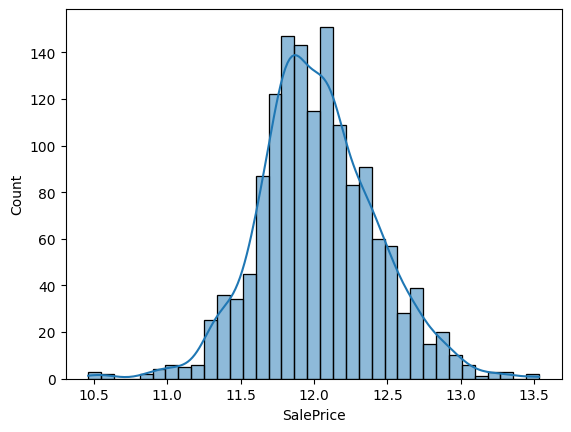

In [447]:
sns.histplot(train_data['SalePrice'], kde=True)
print("Skewness:", train_data['SalePrice'].skew())
print("Kurtosis:", train_data['SalePrice'].kurtosis())

In [448]:
y_train_preprocessed= train_data['SalePrice']

### Duplicate Check:
Checks the combined dataset to see if there are any entirely duplicated rows that need to be removed.

In [449]:
all_data.duplicated().sum()

np.int64(0)

### Near-Constant Features Check:
Iterates through all columns in the dataset to identify "near-constant" features. It looks for columns where a single unique value makes up more than 99% of the data. Features with almost no variance don't help machine learning algorithms learn patterns.

In [450]:
near_constant_columns = []

for col in all_data.columns:
    max_freq = all_data[col].value_counts(normalize=True).max()
    if max_freq > 0.99:
        near_constant_columns.append(col)
        
for col in near_constant_columns:
    print(f"Value counts for {col}:\n{all_data[col].value_counts()}\n")
    print('-'*50)

Value counts for Street:
Street
Pave    2907
Grvl      12
Name: count, dtype: int64

--------------------------------------------------
Value counts for Utilities:
Utilities
AllPub    2916
NoSeWa       1
Name: count, dtype: int64

--------------------------------------------------
Value counts for PoolArea:
PoolArea
0      2906
512       1
648       1
576       1
555       1
480       1
519       1
738       1
144       1
368       1
444       1
228       1
561       1
800       1
Name: count, dtype: int64

--------------------------------------------------


Drops the Street and Utilities columns from the dataset. These were identified in the previous step as near-constant columns

In [451]:
all_data.drop(columns=['Street', 'Utilities'], inplace=True)

### Data Cleaning, Exploration, and Preprocessing for Numerical Columns

Get all numerical columns in the dataset to use in analysis and visualizations

In [452]:
numerical_cols = all_data.select_dtypes(include=[np.number]).columns
print("Numerical columns:\n", numerical_cols)
print("Number of numerical columns:", len(numerical_cols))

Numerical columns:
 Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')
Number of numerical columns: 37


Use a heatmap to check correlations between numerical features and SalePrice.

<Axes: >

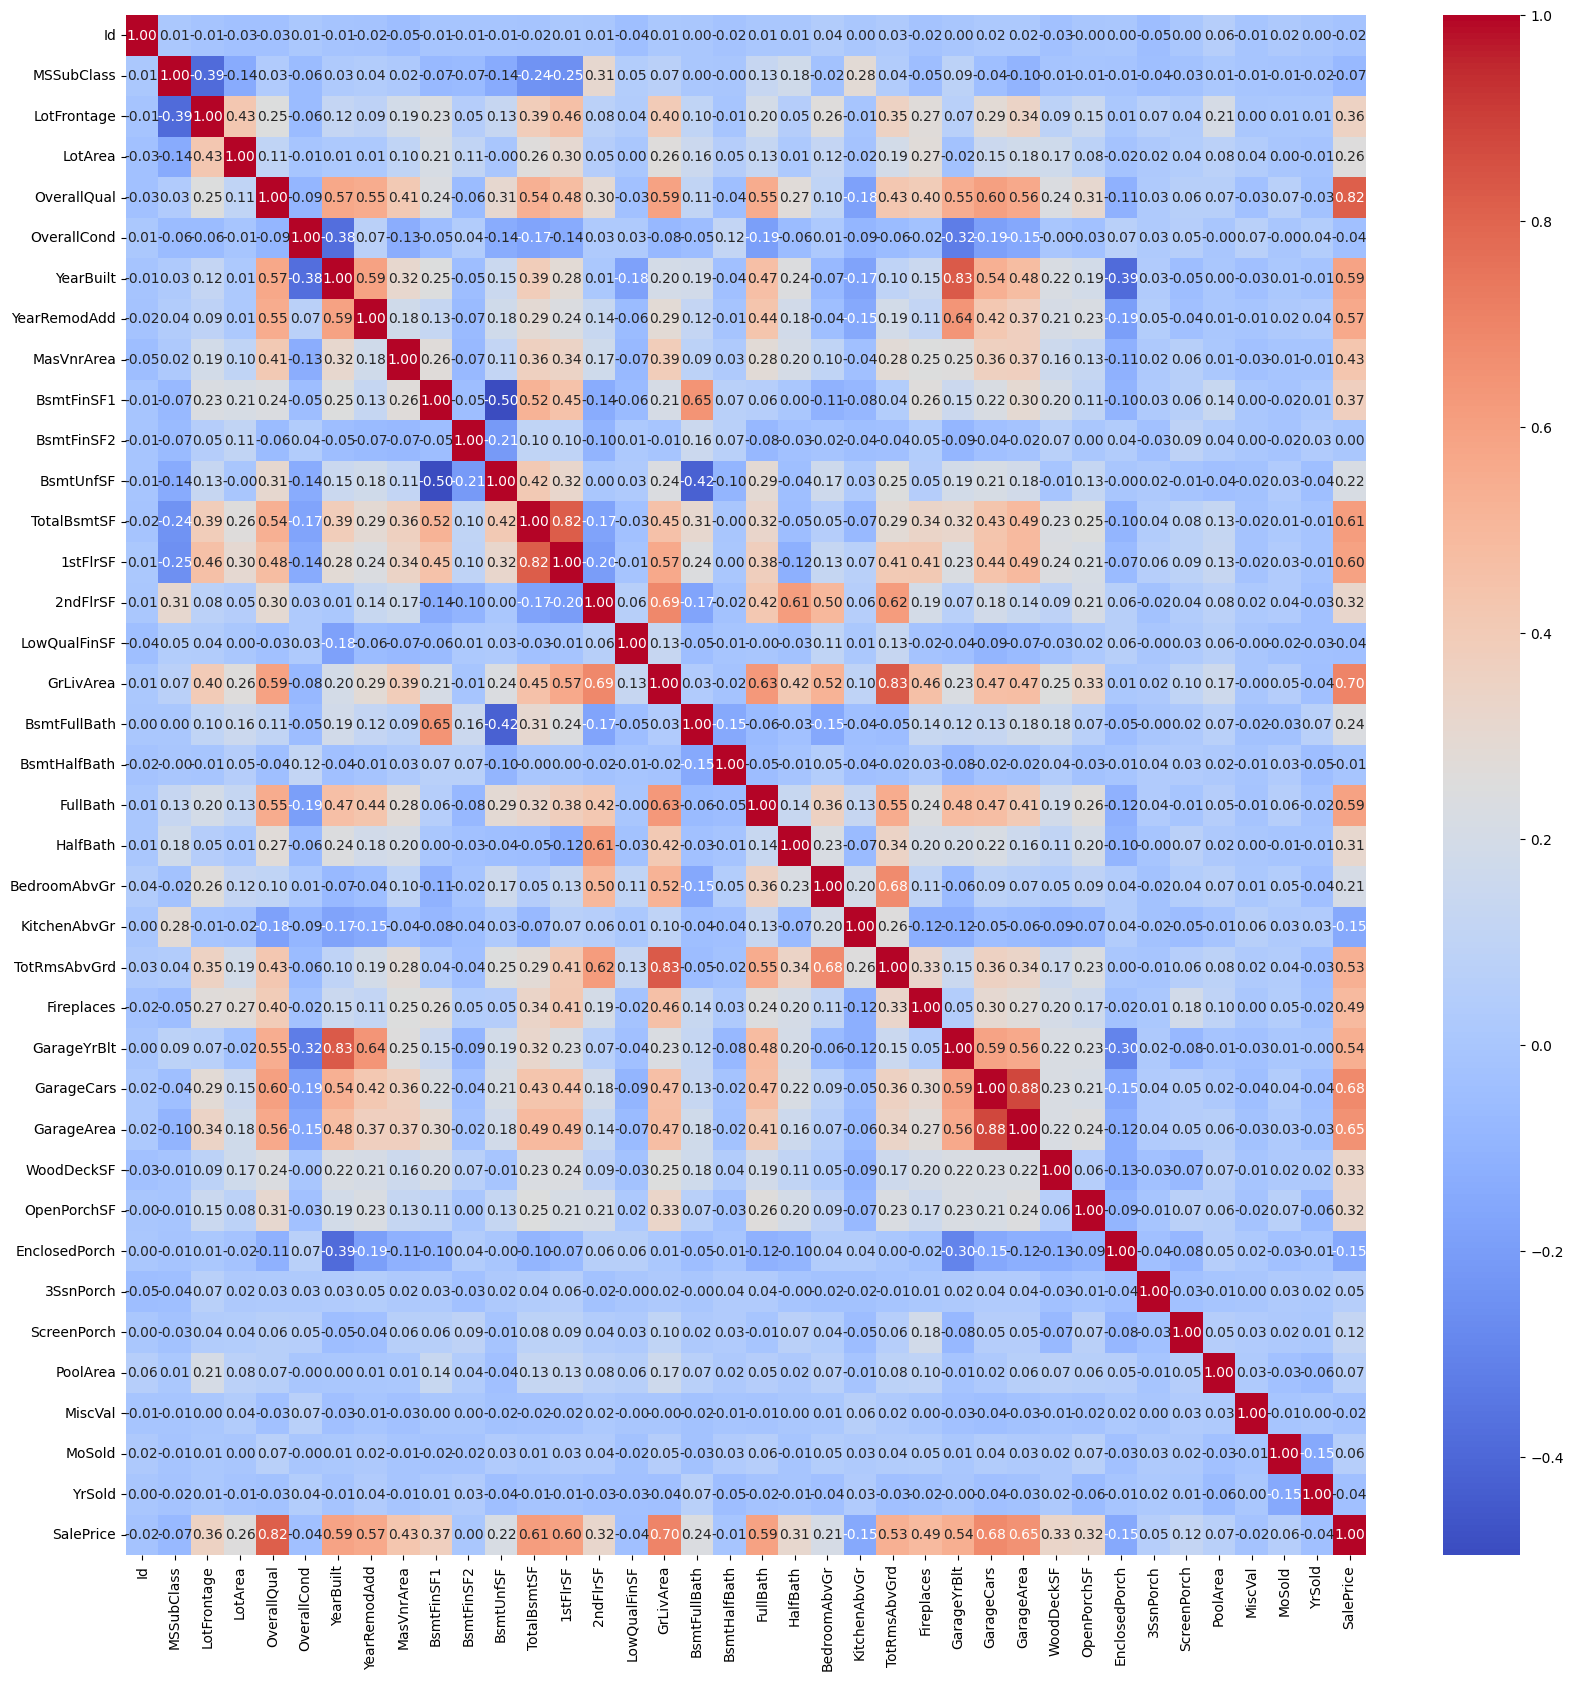

In [453]:
figure, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')

Quickly check summary statistics for numerical features.

In [454]:
all_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.5,1460.0,2189.5,2919.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0


Remove Id column as it’s not useful for modeling.
Convert numeric-looking categorical features to strings to treat them as categories.

In [455]:
all_data.drop(columns=['Id'], inplace=True)
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)

Identify garages built after 2010 and correct incorrect value for row 2592.

In [456]:
all_data.query('GarageYrBlt > 2010')

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2592,20,RL,68.0,8298,NaN,IR1,HLS,Inside,Gtl,Timber,...,0,0,NaN,NaN,NaN,0,9,2007,New,Partial


In [457]:
all_data.loc[2592, 'GarageYrBlt'] = 2007

In [458]:
numerical_cols = all_data.select_dtypes(include=[np.number]).columns
print("Numerical columns:\n", numerical_cols)

Numerical columns:
 Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')


Plot SalePrice against numerical columns

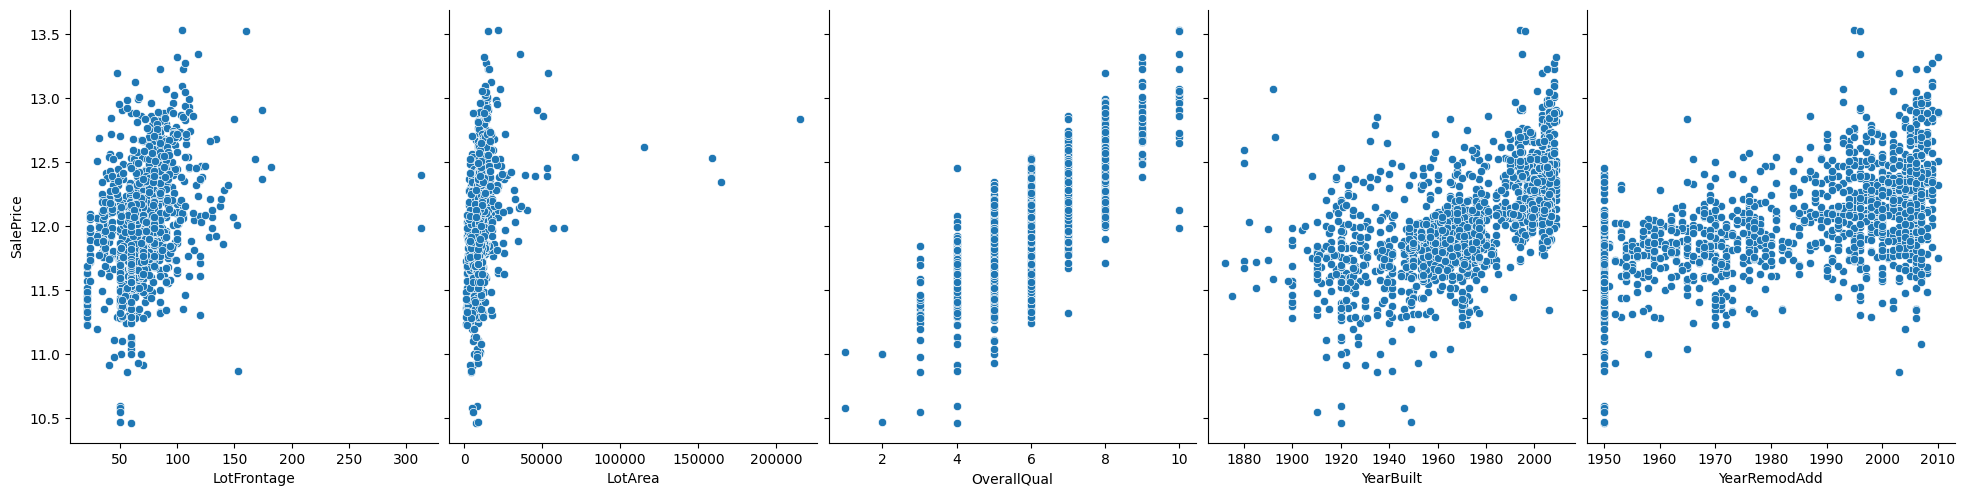

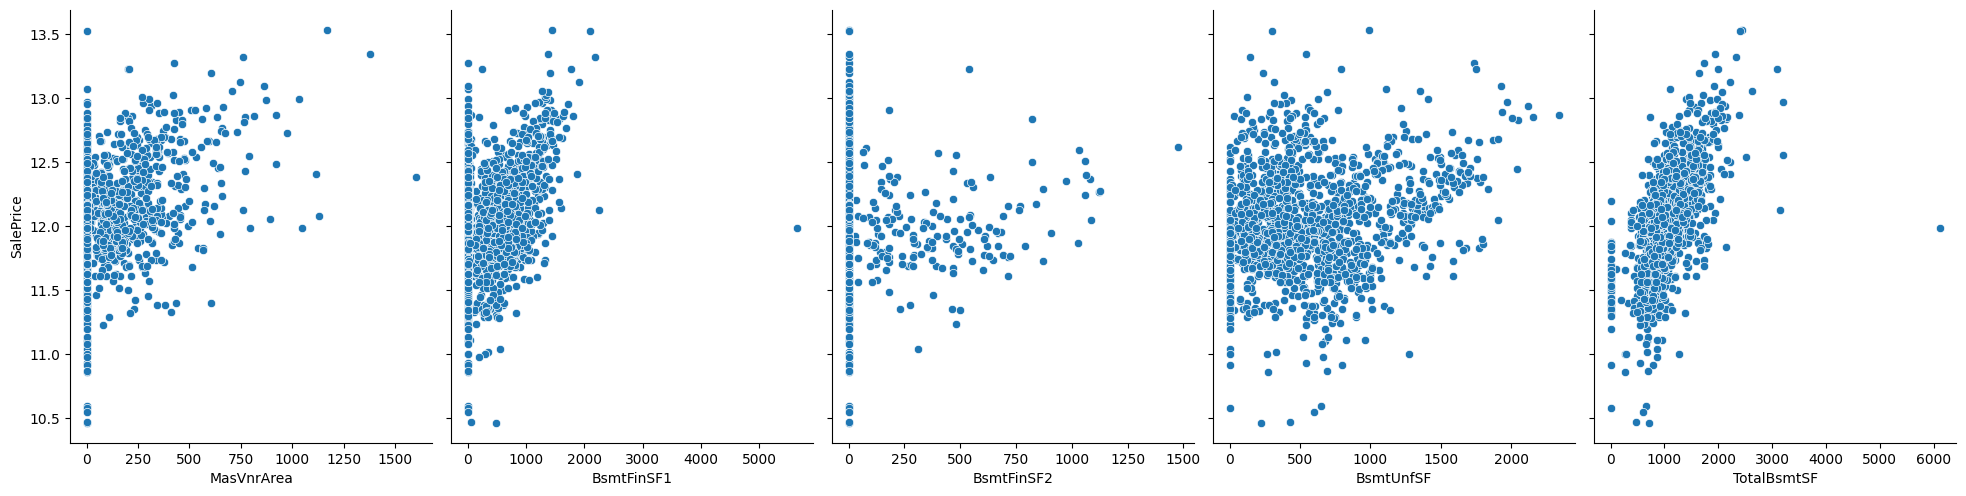

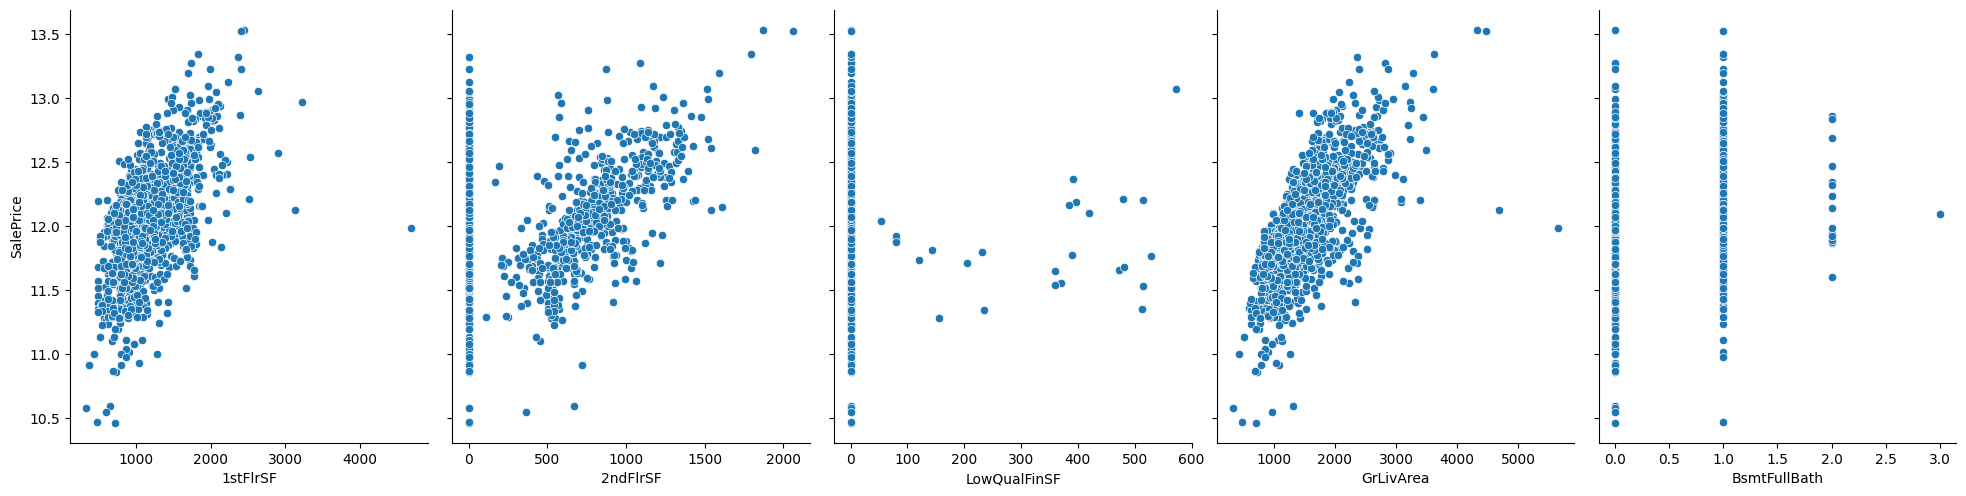

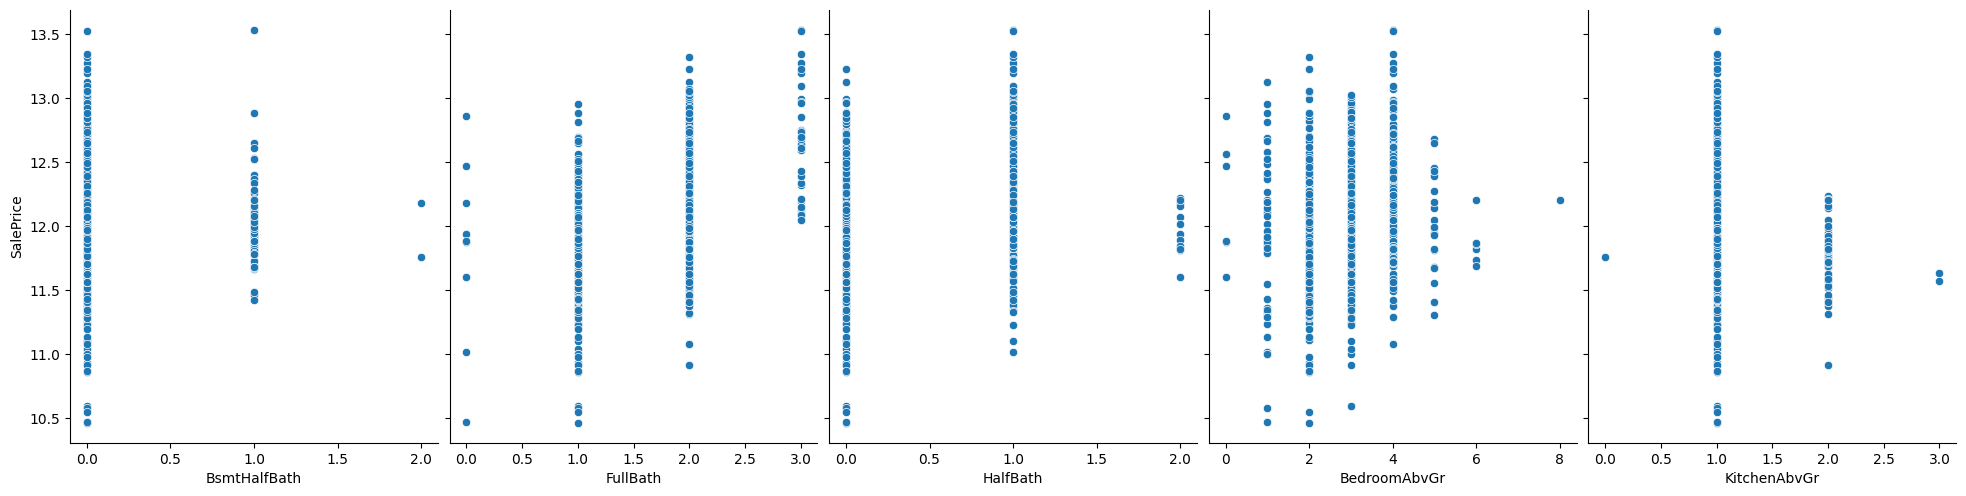

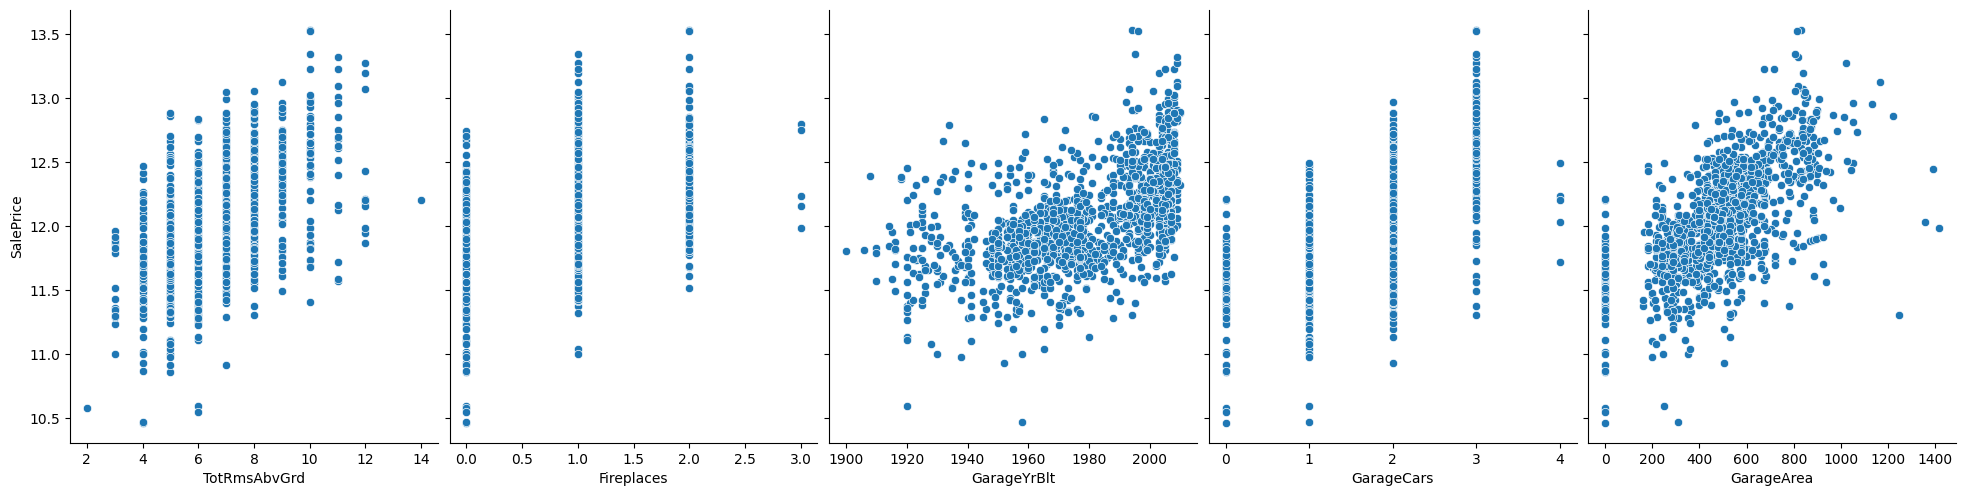

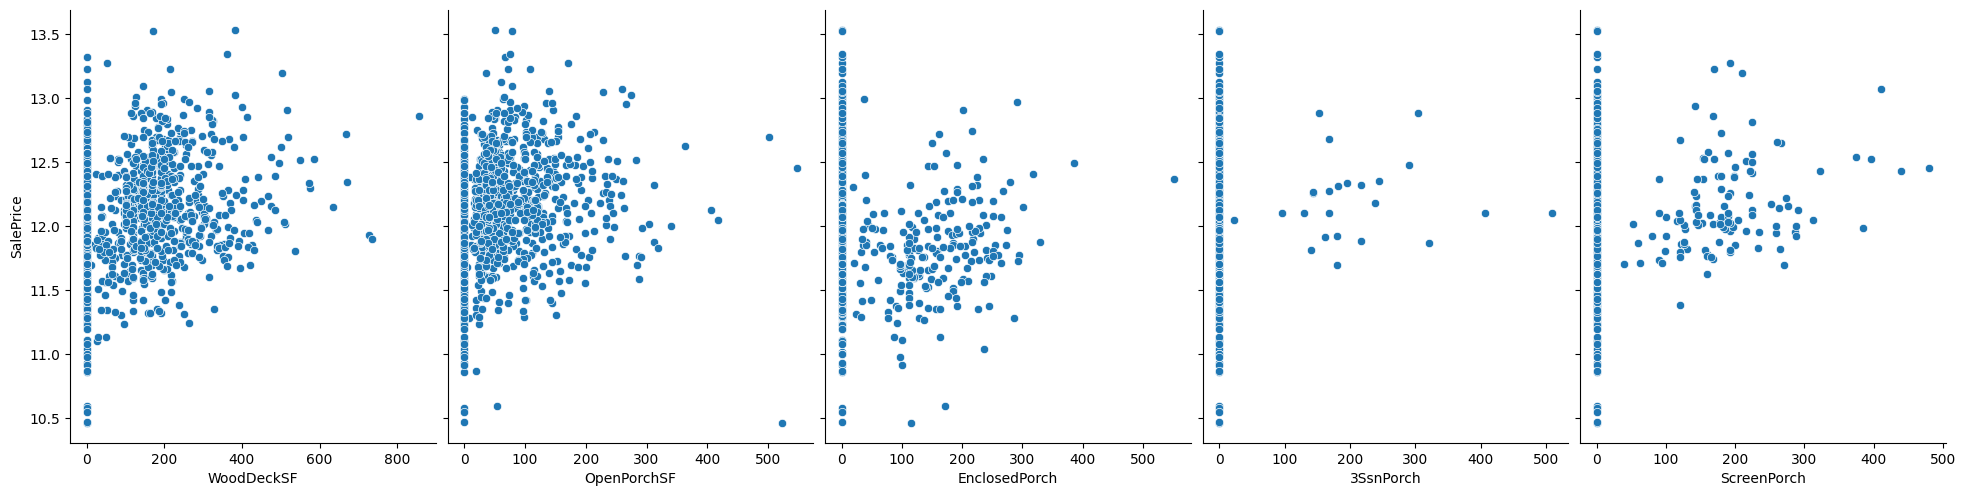

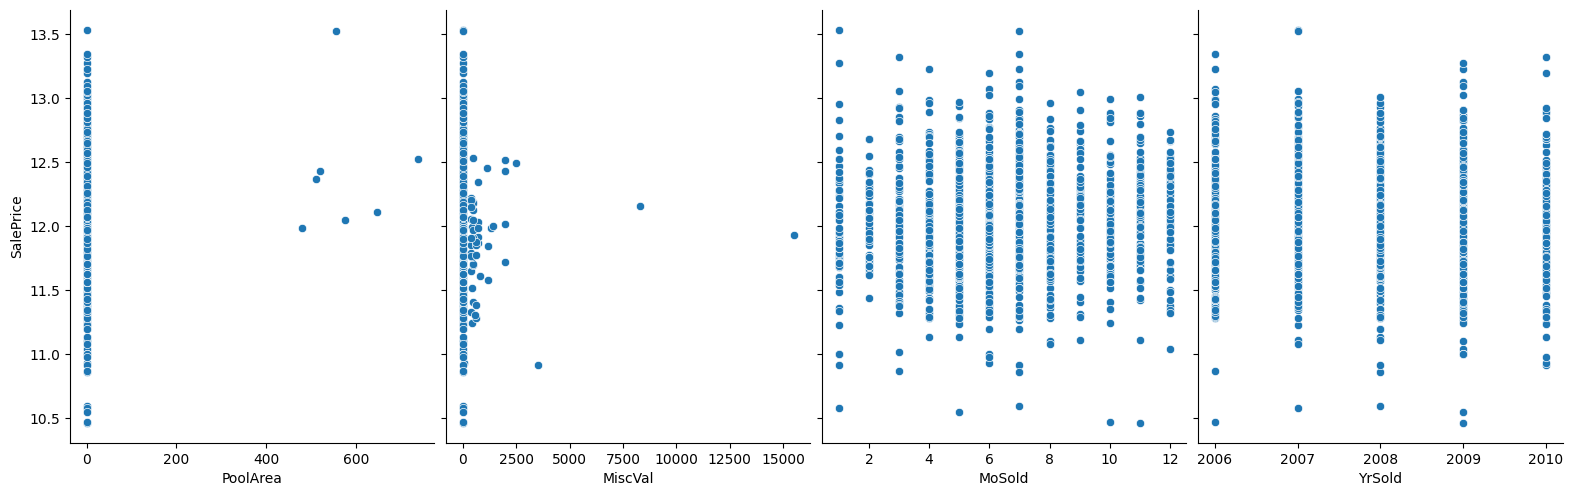

In [459]:
chunk_size = 5

for i in range(0, len(numerical_cols), chunk_size):
    cols_chunk = numerical_cols[i : i + chunk_size]
    
    sns.pairplot(data=train_data, 
                 x_vars=cols_chunk, 
                 y_vars='SalePrice', 
                 height=5, 
                 aspect=0.8) 
    
    plt.show()

Remove extreme outliers based on GrLivArea and SalePrice.

In [460]:
train_data.query('GrLivArea > 4000 and SalePrice < 12.5')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,12.126764
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,11.982935


In [461]:
all_data.drop([523,1298], inplace=True)

Count missing values and percentages for each numerical column.

In [462]:
missing_count = all_data[numerical_cols].isnull().sum()
missing_percent = (missing_count / len(all_data)) * 100

missing_table = pd.DataFrame({
    'Missing Values': missing_count,
    'Percentage': missing_percent
}).sort_values(by='Missing Values', ascending=False)
missing_table = missing_table[missing_table['Missing Values'] > 0]
missing_table

,Missing Values,Percentage
LotFrontage,486,16.660953
GarageYrBlt,159,5.450806
MasVnrArea,23,0.788481
BsmtFullBath,2,0.068564
BsmtHalfBath,2,0.068564
GarageCars,1,0.034282
TotalBsmtSF,1,0.034282
BsmtFinSF1,1,0.034282
BsmtFinSF2,1,0.034282
BsmtUnfSF,1,0.034282


Fill LotFrontage using the median per Neighborhood.

Fill zeros for columns where missing likely means none/zero.

In [463]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
zero_values = [
    'GarageYrBlt', 'MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath', 
    'GarageCars', 'TotalBsmtSF', 'BsmtFinSF1', 'BsmtFinSF2', 
    'BsmtUnfSF', 'GarageArea'
]
for col in zero_values:
    all_data[col] = all_data[col].fillna(0)

Identify skewed numerical features (excluding year columns)

In [464]:
year_cols = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'MoSold']
numerical_cols_without_years = [col for col in numerical_cols if col not in year_cols]
skewness_columns = all_data[numerical_cols_without_years].skew()
skewed_cols = skewness_columns[abs(skewness_columns) > 0.5].index
print("Skewed columns:\n", skewed_cols)
print("Number of skewed columns:", len(skewed_cols))

Skewed columns:
 Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')
Number of skewed columns: 24


Apply Box-Cox transformation to reduce skewness.

In [465]:
from scipy.special import boxcox1p
lambda_ = 0.15
for feature in skewed_cols:
    all_data[feature] = boxcox1p(all_data[feature], lambda_)